In [ ]:
!pip install pandas openpyxl matplotlib

In [2]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_excel("./Online Retail.xlsx") 

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df['hour'] = df['InvoiceDate'].dt.hour

df['weekday'] = df['InvoiceDate'].dt.weekday

df['month'] = df['InvoiceDate'].dt.month

df['week'] = df['InvoiceDate'].dt.isocalendar().week

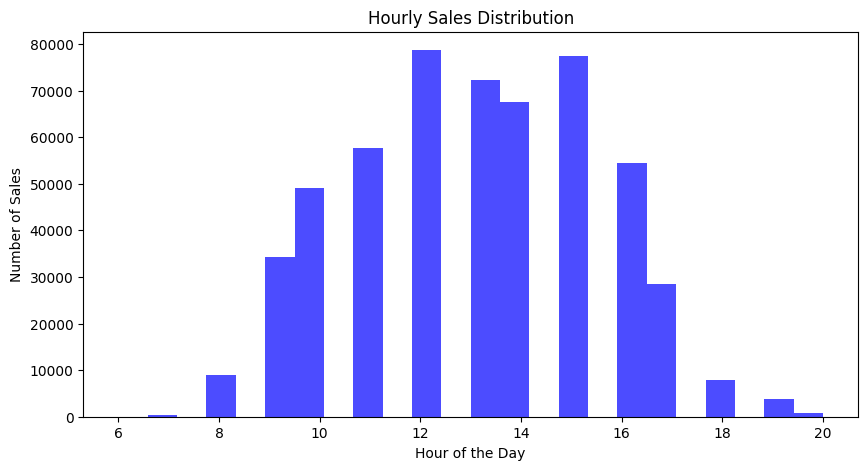

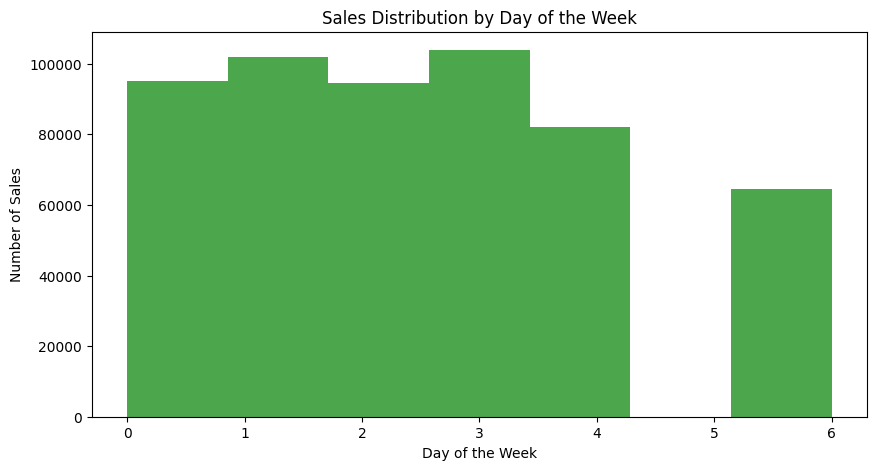

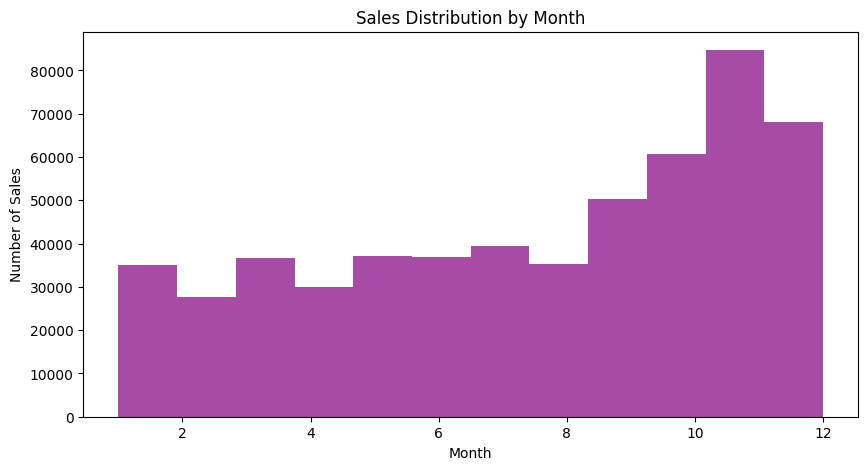

In [9]:
# Plotting Hourly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['hour'], bins=24, alpha=0.7, color='blue')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.show()

# Plotting Weekly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['weekday'], bins=7, alpha=0.7, color='green')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

# Plotting Monthly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['month'], bins=12, alpha=0.7, color='purple')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


In [10]:
df['total_sales'] = df['UnitPrice'] * df['Quantity']
# def time_based_multiplier(hour, weekday, month, week):
#     if month in peak_months or week in peak_weeks or weekday in peak_days:
#         if hour in peak_hours:
#             return 1.4
#         else:
#             return 1.2
#     else:
#         return 0.9

# df['price_multiplier'] = df.apply(
#     lambda x: time_based_multiplier(
#         x['InvoiceDate'].hour,
#         x['weekday'],
#         x['month'],
#         x['week']
#     ),
#     axis=1
# )
# df['adjusted_unit_price'] = df['UnitPrice'] * df['price_multiplier']

# df[['InvoiceNo', 'UnitPrice', 'adjusted_unit_price', 'price_multiplier']].head()


In [11]:
def calculate_peak_periods(data, group_by_column, top_n_percent=20):
    period_sales = data.groupby(group_by_column)['total_sales'].sum().reset_index()
    period_sales_sorted = period_sales.sort_values(by='total_sales', ascending=False)
    num_peak_periods = int((top_n_percent / 100) * len(period_sales_sorted))
    peak_periods = period_sales_sorted.head(num_peak_periods)[group_by_column].tolist()
    return peak_periods

In [12]:

peak_months = calculate_peak_periods(df, 'month')
peak_weeks = calculate_peak_periods(df, 'week')
peak_days = calculate_peak_periods(df, 'weekday')
peak_hours = calculate_peak_periods(df, 'hour')

In [13]:
product_demand = df.groupby('StockCode')['Quantity'].sum().reset_index()
product_demand.rename(columns={'Quantity': 'total_quantity'}, inplace=True)

df = df.merge(product_demand, on='StockCode')

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,total_quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,38830
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,1911
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,1422
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,3589
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,1528
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,2066
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,1690
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,1006


In [15]:
# Count the number of unique StockCode values
unique_stock_codes = df['StockCode'].nunique()

print(f"Number of unique StockCodes: {unique_stock_codes}")


Number of unique StockCodes: 4070
